### Loading the saved models 

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pydicom as dicom
import numpy as np 
import pandas as pd 
import gc
import json
import math
import cv2
import PIL
from PIL import Image
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
from tensorflow import keras
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from sklearn.decomposition import PCA
import time
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import matplotlib.pyplot as plt
import h5py
import random
import os
import seaborn as sns
from PIL import Image


In [1]:
'''Importing libraries'''

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import matplotlib.pyplot as plt
import h5py
import random
import os
import seaborn as sns
from PIL import Image
import tensorflow as tf

### Transfer Learning

In [14]:
train = pd.read_csv("C:/Users/gnana/Downloads/x_test_96.npy/train.csv")

In [15]:
start=time.time()
train_images = np.load('C:/Users/gnana/Downloads/x_test_96.npy/x_train_96.npy')
end=time.time()
print(f"\nTime to load train images: {round(end-start,5)} seconds.")
print('train_images shape: ',train_images.shape)


Time to load train images: 0.53337 seconds.
train_images shape:  (33126, 96, 96, 3)


In [16]:
#target data
train_labels =np.array(train.drop(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis','benign_malignant'],axis=1))
print('Train_labels shape: ',train_labels.shape)

Train_labels shape:  (33126, 1)


In [17]:
#spliting train data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_images,train_labels,test_size=0.3)

In [49]:
print('x_train shape: ',x_train.shape)
print('x_val shape: ',x_val.shape)
print('y_val shape: ',y_val.shape)

x_train shape:  (23188, 96, 96, 3)
x_val shape:  (9938, 96, 96, 3)
y_val shape:  (9938, 1)


In [19]:
model = keras.models.load_model('C:/Users/gnana/vgg16.h5')

In [20]:
model.load_weights('C:/Users/gnana/vgg16.h5')

In [21]:
scores = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.09649145603179932
Test accuracy: 0.9804789423942566


In [13]:
accuracy=[]

In [ ]:
accuracy.append(scores[1])

In [74]:
model_ = keras.models.load_model('C:/Users/gnana/xception.h5')

In [75]:
model_.load_weights('C:/Users/gnana/xception.h5')

In [76]:
scores = model_.evaluate(x_val, y_val, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.4816811084747314
Test accuracy: 0.9804789423942566


In [77]:
accuracy.append(scores[1])

### XGBoost

In [71]:
X_test = pd.read_csv(r'C:/Users/gnana/X_test.csv')
y_test = pd.read_csv(r'C:/Users/gnana/y_test.csv')

In [73]:
# load the model from disk
filename = 'C:/Users/gnana/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.score(X_test, y_test)
print(result1)


0.6797265114849812


In [78]:
accuracy.append(result1)

### Logistic model

In [58]:
df = pd.read_csv('C:/Users/gnana/Downloads/train.csv/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [59]:
test = df.tail(100)
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33026,ISIC_9971896,IP_7261254,female,20.0,torso,unknown,benign,0
33027,ISIC_9972518,IP_0892152,male,50.0,upper extremity,unknown,benign,0
33028,ISIC_9972557,IP_7040211,male,50.0,head/neck,unknown,benign,0
33029,ISIC_9973015,IP_0583343,male,65.0,torso,unknown,benign,0
33030,ISIC_9973089,IP_1969685,male,50.0,torso,unknown,benign,0


In [62]:
'''Getting the images data and flattening them'''

test_images = []
for x in test['image_name']:
    image = 'C:/Users/gnana/Downloads/train/' + x +'.dcm'
    ds = dicom.dcmread(image)
    pixels = ds.pixel_array
    
    test_images.append(pixels.flatten())

In [63]:
'''pad_sequences is used to ensure that all sequences in a list have the same length'''

test_images = tf.keras.preprocessing.sequence.pad_sequences(
  test_images,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)

In [79]:
'''Predicting the test data using Logistic Regression'''

X_test = test_images
y_test = np.array(test['target'])


In [80]:
filename = r'C:\Users\gnana\Logistic_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.72


In [81]:
accuracy.append(result)

## CNN

In [2]:
'''Prepare training data'''

filenames = os.listdir("/Users/prathyusha/Desktop/pranathi/ADS/project/train/")
categories = []
for filename in filenames:
    
    if 'benign' in filename:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [3]:
'''Imagenerator will convert it one-hot encoding and we will convert 1 to malignant and 0 to benign'''

df["category"] = df["category"].replace({0: 'benign', 1: 'malignant'})

In [4]:
train, test_df = train_test_split(df,stratify=df["category"], test_size=0.20, random_state=42)
train = train.reset_index(drop=True)
test_df = test_df.reset_index(drop=True) 

print(train.shape)
print(test_df.shape)

(30662, 2)
(7666, 2)


In [5]:
#Defining constants

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.load_weights("/Users/prathyusha/Desktop/pranathi/ADS/project/model1.h7")

In [8]:
test_df.head()

,filename,category
0,benign5332.jpg,benign
1,benign2937.jpg,benign
2,augmented_image_1190.jpg,malignant
3,augmented_image_1944.jpg,malignant
4,benign14363.jpg,benign


In [9]:
'''Rescaling and reshaping the test images'''

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/prathyusha/Desktop/pranathi/ADS/project/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=IMAGE_SIZE,
    batch_size=15,
    shuffle=False
)

Found 7666 validated image filenames belonging to 2 classes.


In [10]:
tf.config.run_functions_eagerly(True)

In [11]:
scores = model.evaluate_generator(test_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/Users/prathyusha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/Users/prathyusha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Test loss: 0.30772659182548523
Test accuracy: 0.835898756980896


In [ ]:
accuracy.append(scores[1])

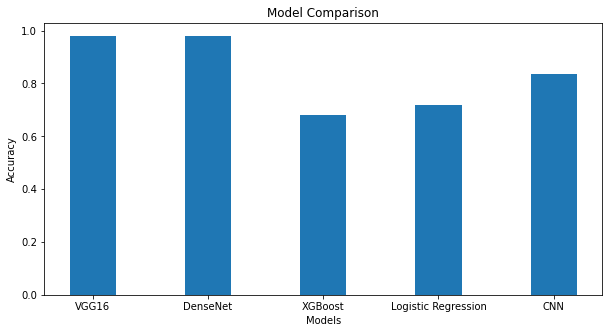

In [15]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['VGG16', 'DenseNet', 'XGBoost','Logistic Regression', 'CNN'], accuracy,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
